# Problem Understanding

The aim of the notebook is to study the nature of ratings of books. The data-set represents the ratings of 10000 most popular books. The major questions we want to answer
- How are ratings of the popular books?
- How do classics authors book ratings compare with popular books?
- Do the frequent user (reader/rater) rating differ from the general masses? Are the related or are there book outliers where the experts and masses disagree?

In [104]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#data from https://github.com/zygmuntz/goodbooks-10k
ratings = pd.read_csv( 'data/ratings.csv' )
to_read = pd.read_csv( 'data/to_read.csv' )
books = pd.read_csv( 'data/books.csv' )
tags = pd.read_csv( 'data/tags.csv' )
book_tags = pd.read_csv( 'data/book_tags.csv')

pd.set_option("display.precision", 2)

# Data Understanding

For the analysis, a 2017 dataset has been cloned from [releases](https://github.com/zygmuntz/goodbooks-10k/releases). The Dataset contains
* ratings.csv: six million ratings (book_id, user_id, rating) for 10,000 popular books from 53,424 users. The books are rated on a scale from 1-5. However, most of the user give only rating 3,4,or 5. 483452 of 5976479 have ratings less than 3 (i.e. only 8% of the books have rating 1 and 2.)
* books.csv: Information (23 features including authors, title, avg_ratings, ...) on ten thousand most popular (i.e . with most ratings) books.
* classics.csv: Information on more than 200 classics books.
* book_tags.csv: contains the tag information of each book. i.e. which tags and how many times the tags where used for each book. There are almost 34000 tags. This can be optimized as favourites and favorites are counted as seperate tags.
* tags.csv: contains the tag names corresponding to the tag_ids

books--> (10000, 23) ratings--> (5976479, 3)
There are 53424 unique users.
There are 10000 unique books.


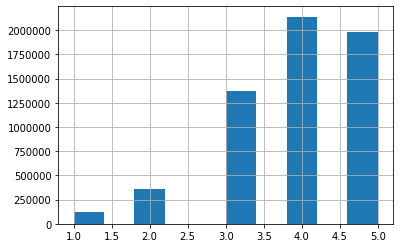

In [24]:
print ('books-->', books.shape , 'ratings-->' ,ratings.shape)
num_unique_user = ratings.user_id.nunique()
print ('There are {0} unique users.'.format(num_unique_user))
print ('There are {0} unique books.'.format(ratings.book_id.nunique()))
ratings.rating.hist()

In [21]:
books.columns.values
books.head(2)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.78e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.78e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...


In [27]:
book_tags.shape
book_tags.head()
tags.tail()
#book_tags.tag_id.nunique()

,tag_id,tag_name
34247,34247,Ｃhildrens
34248,34248,Ｆａｖｏｒｉｔｅｓ
34249,34249,Ｍａｎｇａ
34250,34250,ＳＥＲＩＥＳ
34251,34251,ｆａｖｏｕｒｉｔｅｓ


# Prepare data

- There are no missing values or duplicate data in the dataset. 
- We reduce the number of columns to only the ones interesting for the study. They are 'book_id','title', 'authors', 'original_publication_year','average_rating', 'work_ratings_count','work_text_reviews_count','ratings_5'.


In [47]:

books_summary = books[['book_id','title', 'authors', 'original_publication_year','average_rating', 'work_ratings_count','work_text_reviews_count','ratings_5']]

# Model Data and Results

- Each book has at least 8 ratings and average book has 248 ratings from a user. Note: User is somebody who has rated at least 19 books.

## How are popular books rated?

The mean average rating of popular books 4.00 and the box plot show the quartile description (25%-3.85, median-4-02 and 75%-4.18).

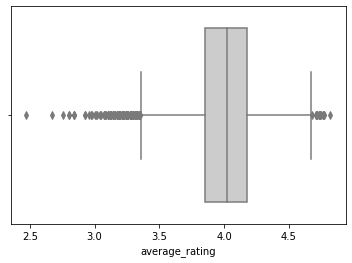

In [53]:
#books_summary.describe()
sns.boxplot(x=books_summary.average_rating,color=".8")

### Show distribution of users based on number of books rated

- The dataset contains only users who have rated at least 19 books and average user has rated 111 books. The max user has rated 200 books implying reading and rating a book a month for 16 years :-)

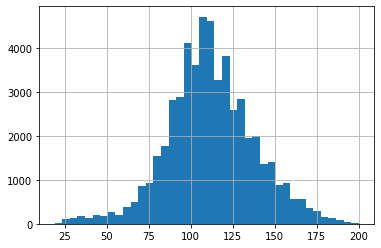

In [59]:

ratings_per_user = ratings.groupby('user_id').user_id.apply(lambda x: len(x))
plt =ratings_per_user.sort_values().hist(bins=40)
plt.set_xlabel = "number of ratings given"
plt.set_ylabel = "by number of user"


In [60]:
#ratings.describe()
#ratings.boxplot(column='rating')
#ratings.rating.describe()
#ratings_per_book = ratings.groupby('book_id').book_id.apply( lambda x: np.log10(len( x )))

In [ ]:
#ratings_per_book.head()
#ratings_per_book.plot.density()
#ratings_per_book.sort_values().hist(bins=40)

# Which books are the most popular ones?

The Books with most ratings are:

In [65]:
books_summary[['title', 'average_rating', 'work_ratings_count']].head(5)
# ratings_per_book.sort_values(ascending=False).index.tolist()[:10]
#book_id = ratings_per_book.sort_values(ascending=False)
#df_pop['title'] = books.iloc[book_id.index].original_title
#df_pop
#popularity_most_ratings = books.iloc[book_id].original_title.to_list()
#print (*popularity_most_ratings, sep='\n')

,title,average_rating,work_ratings_count
0,"The Hunger Games (The Hunger Games, #1)",4.34,4942365
1,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4800065
2,"Twilight (Twilight, #1)",3.57,3916824
3,To Kill a Mockingbird,4.25,3340896
4,The Great Gatsby,3.89,2773745


# Which are the books with best ratings from frequent readers?

Note: ratings only from user who has rated at least 19 books. We will use the term average rating from all users and rating for frequent readers. The top books in the list are dominated by Calvin and Hobbes series. So, it may make sense to group by authors and see who are the top rated authors. However, this list is also dominated by Bill Watterson, the author of Calvin and Hobbes and Neil Gaiman.

In [93]:
avg_ratings_per_book = ratings.groupby('book_id').rating.mean()
avg_ratings_per_book.sort_values(ascending = False)
books_summary_expert_rating = books_summary.merge( avg_ratings_per_book, on = 'book_id')
books_summary_expert_rating["deviation"] = books_summary_expert_rating["rating"]-books_summary_expert_rating["average_rating"]
books_summary_expert_rating["ratings/review_count"] = books_summary_expert_rating["work_ratings_count"]/books_summary_expert_rating["work_text_reviews_count"]
books_summary_expert_rating["5_star_%"] = books_summary_expert_rating["ratings_5"]/books_summary_expert_rating["work_ratings_count"]
books_summary_expert_rating.sort_values(by = 'rating', ascending = False)[['title', 'rating', 'authors']].head(10)
#avg_ratings_per_book.hist(bins=40)
#high_rated_books = avg_ratings_per_book.sort_values(ascending=False).index.tolist()[:10]
#popularity_avg_ratings = books.iloc[high_rated_books].title.to_list()
#print (*popularity_avg_ratings, sep='\n')

,title,rating,authors
3627,The Complete Calvin and Hobbes,4.83,Bill Watterson
7946,ESV Study Bible,4.82,"Anonymous, Lane T. Dennis, Wayne A. Grudem"
9565,Attack of the Deranged Mutant Killer Monster S...,4.77,Bill Watterson
6919,The Indispensable Calvin and Hobbes,4.77,Bill Watterson
8977,The Revenge of the Baby-Sat,4.76,Bill Watterson
6360,There's Treasure Everywhere: A Calvin and Hobb...,4.76,Bill Watterson
6589,The Authoritative Calvin and Hobbes: A Calvin ...,4.76,Bill Watterson
4482,It's a Magical World: A Calvin and Hobbes Coll...,4.75,Bill Watterson
3274,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",4.74,"J.K. Rowling, Mary GrandPré"
1787,The Calvin and Hobbes Tenth Anniversary Book,4.73,Bill Watterson


In [92]:
avg_ratings_per_author = books_summary_expert_rating.groupby('authors').rating.mean()
avg_ratings_per_author.sort_values(ascending = False).head(5)

authors
Anonymous, Lane T. Dennis, Wayne A. Grudem                                                                                                                                                                                  4.82
Bill Watterson                                                                                                                                                                                                              4.74
Hafez                                                                                                                                                                                                                       4.72
Neil Gaiman, Mike Dringenberg, Chris Bachalo, Michael Zulli, Kelly Jones, Charles Vess, Colleen Doran, Malcolm Jones III, Steve Parkhouse, Daniel Vozzo, Lee Loughridge, Steve Oliff, Todd Klein, Dave McKean, Sam Kieth    4.68
Alisa Kwitney, Neil Gaiman                                                                  

In [89]:

books_summary_expert_rating.describe()
#book_classics = books_summary_expert_rating[books_summary_expert_rating['original_publication_year'] < 1940]
#book_modern = books_summary_expert_rating[books_summary_expert_rating['original_publication_year'] >= 1940]
#avg_expert_rating_classics = book_classics['average_rating'].mean()
#avg_expert_rating_modern = book_modern['average_rating'].mean()
#print (avg_expert_rating_classics, avg_expert_rating_modern)
#underrated books
#book_classics.sort_values(by=['original_publication_year'])[240:260]
#book_classics.sort_values(by=['work_text_reviews_count'])

,book_id,original_publication_year,average_rating,work_ratings_count,work_text_reviews_count,ratings_5,rating,deviation,ratings/review_count,5_star_%
count,10000.00,9979.00,10000.00,1.00e+04,10000.00,1.00e+04,10000.00,10000.00,10000.00,10000.00
mean,5000.50,1981.99,4.00,5.97e+04,2919.96,2.38e+04,3.90,-0.10,33.59,0.37
std,2886.90,152.58,0.25,1.68e+05,6124.38,7.98e+04,0.29,0.10,75.06,0.12
min,1.00,-1750.00,2.47,5.51e+03,3.00,7.54e+02,2.08,-0.93,3.65,0.06
25%,2500.75,1990.00,3.85,1.54e+04,694.00,5.33e+03,3.73,-0.15,11.51,0.29
50%,5000.50,2004.00,4.02,2.38e+04,1402.00,8.84e+03,3.92,-0.09,19.72,0.37
75%,7500.25,2011.00,4.18,4.59e+04,2744.25,1.73e+04,4.10,-0.04,35.09,0.45
max,10000.00,2017.00,4.82,4.94e+06,155254.00,3.01e+06,4.83,0.51,3702.00,0.86


# Genres: Which genres do the popular books belong to?

- A book may belong to multiple genres. The genres are the same as the main categories in goodreads. 
- The top genres are fiction, contemporary, fantasy, romance, mystery, classics.

In [102]:
genres = ["Art", "Biography", "Business", "Chick Lit", "Children's", "Christian", "Classics", "Comics",
"Contemporary", "Cookbooks", "Crime", "Fantasy", "Fiction", "Gay and Lesbian", "Graphic Novels", 
"Historical Fiction", "History", "Horror", "Humor and Comedy", "Manga", "Memoir", "Music", "Mystery", "Nonfiction", 
"Paranormal", "Philosophy", "Poetry", "Psychology", "Religion", "Romance", "Science", "Science Fiction", 
"Self Help", "Suspense", "Spirituality", "Sports", "Thriller", "Travel", "Young Adult"]

genre_lower = list(map(lambda x:x.lower(), genres))
pat = r'+$|'.join(genre_lower)
considered_tags = tags[tags.tag_name.str.match(pat)]

considered_tags_id = considered_tags.tag_id.tolist()
considered_book_tags = book_tags[book_tags.tag_id.isin(considered_tags_id)]

#considered_book_tags
#popular_tags_id = genres_count.sort_values(ascending=False).index.tolist()[:10]
genres_count = considered_book_tags.groupby('tag_id')["count"].apply(lambda x: len(x)).sort_values(ascending=False)

considered_tags = tags.iloc[genres_count.index.tolist()].copy()
count = genres_count.values.tolist()
considered_tags['num_popu_books'] = count

#genres_count.head()
#print ('top 10 popular tags:'+repr(tags.iloc[popular_tags_id].tag_name.tolist()))
#print (popular_tags_id)
#tags[tags.tag_id==11743]
#ratings_per_book = ratings.groupby('book_id').book_id.apply( lambda x: np.log10(len( x )))
#print (pat)
#print(genre_lower)
#book_tags.head() #book_id, tag_id, count
#tags[tags.tag_id==30574] #tag_id, tag_name #tags[(tags.tag_name=="art")|(tags.tag_name=="crime")]
#book_classics[book_classics['authors'].str.contains('|'.join(authors))]

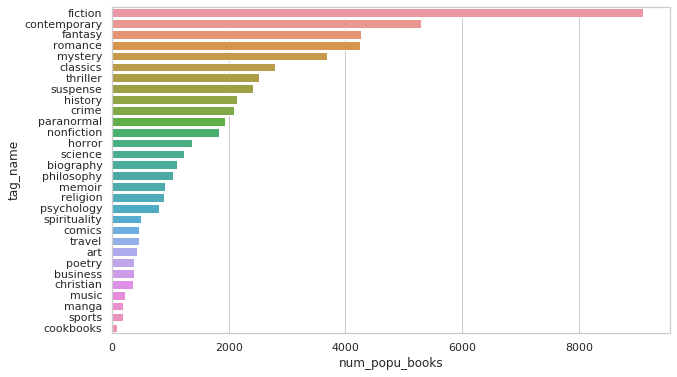

In [109]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

sns.set(style="whitegrid")
ax = sns.barplot(x="num_popu_books", y= "tag_name", data = considered_tags)

ax.set_ylabel="Genre"
ax.set_xlabel="Book Count"

The following lines show various lists. For, example deviation shows the diference between average ratings and frequent reader ratings.

In [111]:
#books_summary_expert_rating.head(10)
#books_summary_expert_rating.sort_values(by=['ratings/review_count','rating','work_text_reviews_count']).head(10)
#books_summary_expert_rating.sort_values(by=['work_text_reviews_count'],ascending=False).head(10)
#books_summary_expert_rating.sort_values(by=['rating'],ascending=False).head(10)
#books_summary_expert_rating.sort_values(by=['rating']).head(10)
#books_summary_expert_rating.sort_values(by=['work_ratings_count'],ascending=False).head(10)
books_summary_expert_rating.sort_values(by=['deviation'],ascending=False).head(3)
#books_summary_expert_rating.sort_values(by=['average_rating'],ascending=True).tail(10)

,book_id,title,authors,original_publication_year,average_rating,work_ratings_count,work_text_reviews_count,ratings_5,rating,deviation,ratings/review_count,5_star_%
1903,1904,The Sandman: Overture,"Neil Gaiman, J.H. Williams III, Dave Stewart, ...",2015.0,3.94,53412,1043,25115,4.45,0.51,51.21,0.47
8547,8548,This is Not My Hat,Jon Klassen,2012.0,4.23,14941,2377,7429,4.58,0.35,6.29,0.50
8737,8738,Dear Theo,"Vincent van Gogh, Irving Stone, Jean Stone",1937.0,4.09,9761,189,4373,4.42,0.33,51.65,0.45


# Are the great classic books rate differently than popular books?

The following compilation of authors and books is recommended by Mortimer Adler's reading list from the book 'How to Read'. 
Several Authors are not in dataset as they may not have enough ratings/reviews. Mostly Scientific Works.
Furthermore, several classics from eastern civilization are absent and the list should be extended.

In [115]:
#Classics in dataset recommended by Mortimer Adler's reading list. 
#Authors

authors = ['Homer', 'Aeschylus', 'Sophocles', 'Herodotus', 'Euripides', 'Thucydides', 
           'Hippocrates', 'Aristophanes', 'Plato', 'Aristotle', 'Epicurus', 'Euclid', 'Archimedes', 'Perga', 'Cicero', 
           'Lucretius', 'Virgil', 'Horace', 'Livy', 'Ovid', 'Plutarch', 'Tacitus', 'Gerasa', 'Epictetus', 'Ptolemy', 
           'Lucian', 'Aurelius', 'Galen', 'Plotinus', 'Augustine', 'Aquinas', 'Alighieri', 'Chaucer', 'Vinci', 
           'Machiavelli', 'Erasmus', 'Copernicus', 'More', 'Luther', 'Rabelais', 'Calvin', 'Montaigne', 'Gilbert', 
           'Cervantes', 'Spenser', 'Bacon', 'Shakespeare', 'Galilei', 'Kepler', 'Harvey', 'Hobbes', 'Descartes', 'Milton', 
           'Molière', 'Pascal', 'Huygens', 'Spinoza', 'Locke', 'Racine', 'Newton', 'Leibniz', 'Defoe', 'Swift', 
           'Congreve', 'Berkeley', 'Pope', 'Montesquieu', 'Voltaire', 'Fielding', 'Johnson', 'Hume', 'Rousseau', 
           'Sterne', 'Smith', 'Kant', 'Gibbon', 'Boswell', 'Lavoisier', 'Madison', 'Bentham', 'Goethe', 'Fourier', 
           'Hegel', 'Wordsworth', 'Coleridge', 'Austen', 'Clausewitz', 'Stendhal', 'Byron', 'Schopenhauer', 'Faraday', 
           'Lyell', 'Comte', 'Balzac', 'Emerson', 'Hawthorne', 'Tocqueville', 'Mill', 'Darwin', 'Dickens', 'Bernard', 
           'Thoreau', 'Marx', 'Eliot', 'Melville', 'Dostoyevsky', 'Flaubert', 'Ibsen', 'Tolstoy', 'Twain', 
           'James', 'James', 'Nietzsche', 'Poincare', 'Freud', 'Shaw', 'Planck', 'Bergson', 'Dewey', 'Whitehead', 
           'Santayana', 'Lenin', 'Proust', 'Russell', 'Mann', 'Einstein', 'Joyce', 'Maritain', 'Kafka', 'Toynbee', 
           'Sartre', 'Solzhenitsyn']

classics = pd.read_csv( 'data/classic.csv' )
rated_classic_authors = classics['authors'].tolist()
classics.describe()
classics.head()

,book_id,title,authors,original_publication_year,average_rating,work_ratings_count,work_text_reviews_count,rating,deviation
0,10,Pride and Prejudice,Jane Austen,1813.0,4.24,2191465,49152,4.19,-0.05
1,29,Romeo and Juliet,"William Shakespeare, Robert Jackson",1595.0,3.73,1672889,14778,3.71,-0.02
2,58,The Adventures of Huckleberry Finn,"Mark Twain, John Seelye, Guy Cardwell",1884.0,3.80,1001491,12448,3.83,0.03
3,76,Sense and Sensibility,"Jane Austen, Tony Tanner, Ros Ballaster",1811.0,4.06,779382,11526,3.99,-0.07
4,79,The Odyssey,"Homer, Robert Fagles, E.V. Rieu, Frédéric Mugl...",-720.0,3.73,710757,8101,3.72,-0.01


Many of the classic authors book do not appear in the popular 10k books list. It seems the authors writing scientific and philosphical works do not appear in popular books list.

In [94]:
unrated_classic_authors = []
#print (rated_classic_authors)

for author in authors:
    if not any(author in s for s in rated_classic_authors):
        unrated_classic_authors.append(author)

print ('number of unrated classic authors in data set: '+ repr(len(unrated_classic_authors)))
print (unrated_classic_authors)

number of unrated classic authors in data set: 56
['Hippocrates', 'Epicurus', 'Euclid', 'Archimedes', 'Perga', 'Cicero', 'Lucretius', 'Horace', 'Livy', 'Plutarch', 'Tacitus', 'Gerasa', 'Epictetus', 'Ptolemy', 'Lucian', 'Galen', 'Plotinus', 'Aquinas', 'Erasmus', 'Copernicus', 'Luther', 'Calvin', 'Montaigne', 'Bacon', 'Galilei', 'Kepler', 'Harvey', 'Pascal', 'Huygens', 'Racine', 'Newton', 'Leibniz', 'Congreve', 'Berkeley', 'Pope', 'Montesquieu', 'Boswell', 'Lavoisier', 'Bentham', 'Fourier', 'Wordsworth', 'Clausewitz', 'Schopenhauer', 'Faraday', 'Lyell', 'Comte', 'Dostoyevsky', 'Poincare', 'Planck', 'Bergson', 'Dewey', 'Whitehead', 'Santayana', 'Lenin', 'Maritain', 'Toynbee']


The following is list of classic books sorted by ratings per review. For example Leonardo's Notebooks have almost 240 ratings for a given review. Whereas 'Lady Susan' a Jane Austen classic has 10 ratings per given review. The feature ratings per review was created to quantify followership.

In [119]:
classics["ratings/review_count"] = classics["work_ratings_count"]/classics["work_text_reviews_count"]
classics.sort_values(by=['ratings/review_count'], ascending=True).head(5)

,book_id,title,authors,original_publication_year,average_rating,work_ratings_count,work_text_reviews_count,rating,deviation,ratings/review_count
149,6302,Lady Susan,"Jane Austen, Robert William Chapman",1871.0,3.56,20969,2047,3.51,-0.05,10.24
100,3508,"Swann's Way (In Search of Lost Time, #1)","Marcel Proust, Simon Vance, Lydia Davis",1913.0,4.14,31697,2371,4.02,-0.12,13.37
174,7997,Washington Square,"Henry James, Michael Cunningham",1880.0,3.67,14611,1068,3.63,-0.04,13.68
68,1878,The Turn of the Screw,Henry James,1898.0,3.45,66011,4401,3.41,-0.04,15.00
181,8471,Pudd'nhead Wilson,Mark Twain,1893.0,3.74,13549,854,3.72,-0.02,15.87


# Visualization: Are the great classic books rate differently than popular books?

Try out diffent plots for comparing the control set of all books and books from all classic authors.

It shows that
- 56 of 129 classic authors are not in dataset of books. The dataset can be scraped for 2020.
-
- The users who rate frequently tend to give lower ratings.
- Out of 10,000 books in control set only 212 are written by classic authors.
- The standard deviation for classics(.21) is less than control set(.29)
- 

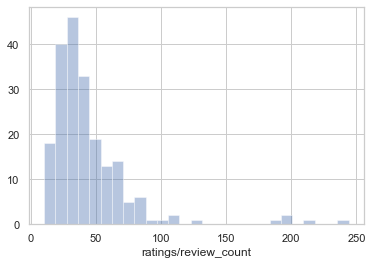

In [111]:
#t.violinplot(column=['average_rating', 'rating'])
sns.distplot(classics["ratings/review_count"], kde=False,rug=False)

#sns.distplot(classics["ratings/review_count"],kde=False, rug=False,color="red")
#t["rating"].plot.kde()
#import matplotlib.pyplot as plt
#fig = plt.figure()
#for frame in [t,books_summary_expert_rating]:
#    plt.hist(frame['average_rating'], normed=True, alpha=0.5)
#plt.show()

For classics, one review has been given for every 44 ratings. Whereas for control set, one review has been given for every 34 ratings.

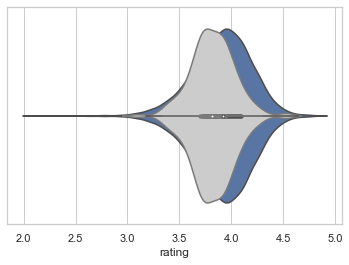

In [97]:
#sns.stripplot(x=books_summary_expert_rating["rating"])
#sns.stripplot(x=classics["average_rating"],color=".8")
sns.violinplot(x=books_summary_expert_rating["rating"])
sns.violinplot(x=classics["rating"],color=".8")

The above plot show  The classic books have average rating(3.82) less than control set (3.90). Note: This is for average rating from users of rate frequently. 
The average rating from all users for classics (3.88) is less than control set (4.0). Therfore, it can be inferred that frequent readers give lower ratings on average as shown in box plot.

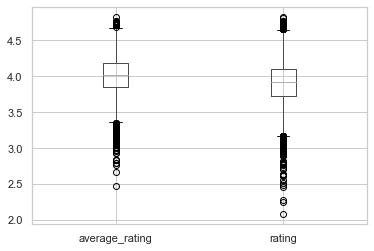

In [98]:
books_summary_expert_rating.boxplot(column=['average_rating', 'rating'])

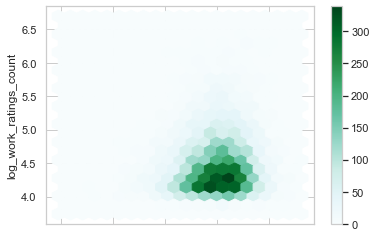

In [99]:
books_summary_expert_rating['log_work_ratings_count'] = np.log10(books_summary_expert_rating['work_ratings_count'])
books_summary_expert_rating.plot.hexbin(x='average_rating',
                      y='log_work_ratings_count', gridsize=20)

The above plot shows that most of the popular books are rated between 3 and 5 and have between 10000 and 100,000 ratings.

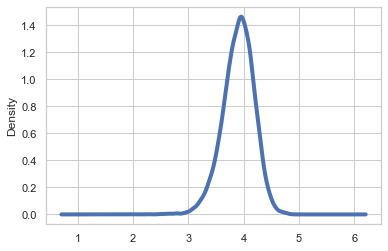

In [100]:
books_summary_expert_rating.rating.plot.density(linewidth=4)

In [120]:
def ann(row):
    """Function used for annotating data point information in seaborn plot
    row: row[0] contains column values and row[1] contains corresponding data point to plot
    """ 
    ind = row[0]
    r = row[1]
    plt.gca().annotate(r["title"], xy=(r["rating"], r["average_rating"]), 
            xytext=(2,2) , textcoords ="offset points", )

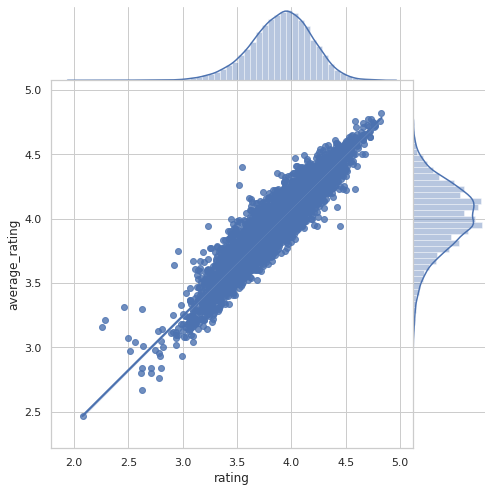

In [121]:
x1 = books_summary_expert_rating['rating']
x2 = books_summary_expert_rating['average_rating']
sns.jointplot(x1, x2, kind="reg", height=7, space=0)

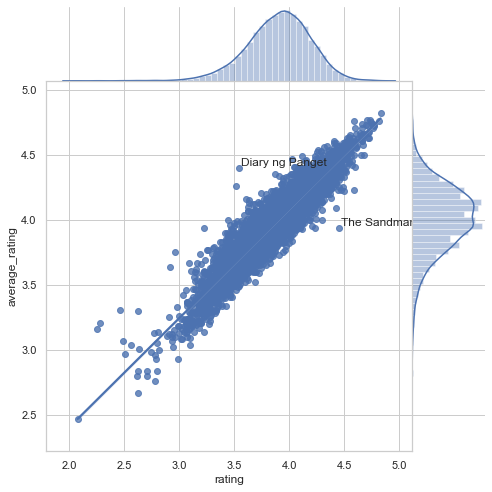

In [103]:
x1 = books_summary_expert_rating['rating']
x2 = books_summary_expert_rating['average_rating']
g = sns.jointplot(x1, x2, kind="reg", height=7, space=0)

#indices to annotate
head = books_summary_expert_rating[books_summary_expert_rating.rating > 3].sort_values(by=['deviation'], ascending=[False]).head(1)
tail = books_summary_expert_rating[books_summary_expert_rating.rating > 3].sort_values(by=['deviation'], ascending=[False]).tail(1)

for row in head.iterrows():
    ann(row)
for row in tail.iterrows():
    ann(row)

plt.show()



The above plot shows the deviation of popular books between mass rating and frequent reader rating. The sandman overtures enjoys quite higher rating among frequent readers than all readers. Wheras, for Diary ng Panget it is other was round.

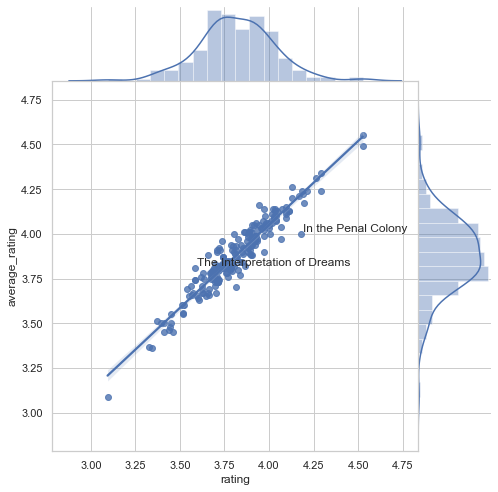

In [104]:
x1 = classics['rating']
x2 = classics['average_rating']
g = sns.jointplot(x1, x2, kind="reg", height=7, space=0)

#indices to annotate
head = classics[classics.rating > 3].sort_values(by=['deviation'], ascending=[False]).head(1)
tail = classics[classics.rating > 3].sort_values(by=['deviation'], ascending=[False]).tail(1)

for row in head.iterrows():
    ann(row)
for row in tail.iterrows():
    ann(row)

plt.show()

The above plot shows the deviation of classic books between mass rating and frequent reader rating. The Kafka's Penal Colony enjoys quite higher rating among frequent readers than all readers. Wheras, for Sigmund Freuds 'Interpretation of Dreams' it is other was round.

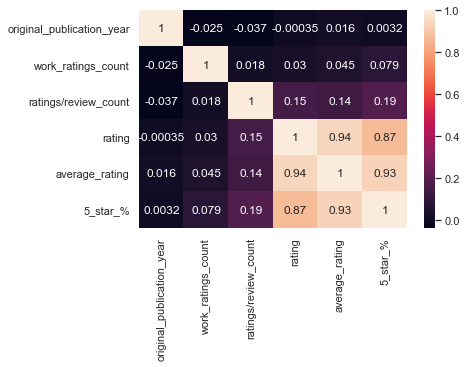

In [105]:
df_books = books_summary_expert_rating[['original_publication_year','work_ratings_count',
                                        'ratings/review_count',
                                        'rating','average_rating','5_star_%']]

sns.heatmap(df_books.corr(), annot = True)


The above plot shows the correlation of different features.

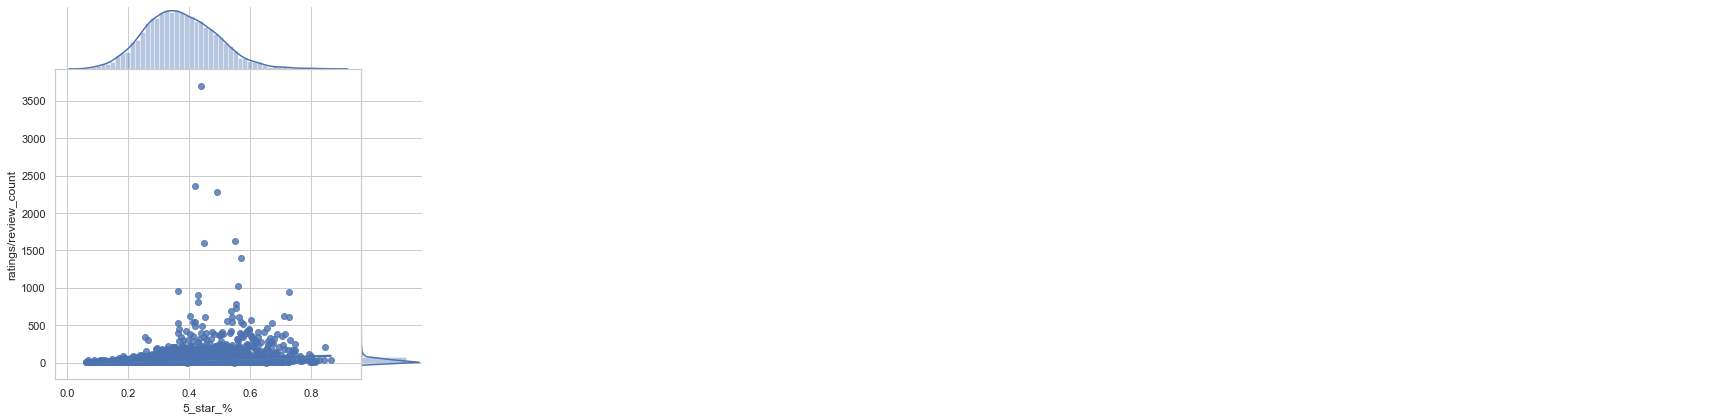

In [106]:
x1 = books_summary_expert_rating['5_star_%']
x2 = books_summary_expert_rating['ratings/review_count']
g = sns.jointplot(x1, x2, kind="reg",  space=0)

#indices to annotate
head = books_summary_expert_rating[books_summary_expert_rating.rating > 3].sort_values(by=['5_star_%'], ascending=[False]).head(1)
tail = books_summary_expert_rating[books_summary_expert_rating.rating > 3].sort_values(by=['5_star_%'], ascending=[False]).tail(1)

for row in head.iterrows():
    ann(row)
for row in tail.iterrows():
    ann(row)

plt.show()
